# Cirrhosis classification

In this notebook, we will run a basic machine-learning classificaiton pipeline on a relatively often used cirrhosis classification dataset [[Qin, et al 2014]](https://www.nature.com/articles/nature13568). We are using this dataset because the data is public, and the underlying biological signature has been researched quite a lot. 

The main thing we expect to find is an increase in oral inhabitant in the gut microbiome.

In [1]:
import numpy as np
import pandas as pd
import sys

#This should be the location where you have stored the codebase on your computer
sys.path.append('C:\\Users\\basvo\\Documents\\GitHub\\BV_codebase')

import machine_learning
import metagenomics

In [2]:
# location on the computer where the data is stored
filepath = '../toy_datasets/cirrhosis/cirrhosis_mp4_abundance_species.csv'

# Load in the file
df = pd.read_csv(filepath, index_col=0)
df.head()

,k__Archaea|p__Candidatus_Thermoplasmatota|c__Thermoplasmata|o__Methanomassiliicoccales|f__Candidatus_Methanomethylophilaceae|g__Candidatus_Methanomethylophilus|s__Candidatus_Methanomethylophilus_alvus,k__Archaea|p__Candidatus_Thermoplasmatota|c__Thermoplasmata|o__Methanomassiliicoccales|f__Methanomassiliicoccaceae|g__Methanomassiliicoccaceae_unclassified|s__Methanomassiliicoccaceae_archaeon_DOK,k__Archaea|p__Candidatus_Thermoplasmatota|c__Thermoplasmata|o__Methanomassiliicoccales|f__Methanomassiliicoccaceae|g__Methanomassiliicoccaceae_unclassified|s__Methanomassiliicoccaceae_unclassified_SGB380,k__Archaea|p__Euryarchaeota|c__CFGB343|o__OFGB343|f__FGB343|g__GGB781|s__GGB781_SGB1024,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacteriaceae_unclassified|s__Methanobacteriaceae_archaeon,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_oralis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_cuniculi,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinobacteria_unclassified|f__Actinobacteria_unclassified|g__GGB39918|s__GGB39918_SGB47522,...,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_hominis,k__Bacteria|p__Verrucomicrobia|c__CFGB2164|o__OFGB2164|f__FGB2164|g__GGB6132|s__GGB6132_SGB8779,k__Bacteria|p__Verrucomicrobia|c__CFGB2165|o__OFGB2165|f__FGB2165|g__GGB6133|s__GGB6133_SGB8780,k__Bacteria|p__Verrucomicrobia|c__Opitutae|o__Opitutales|f__Opitutales_unclassified|g__GGB6128|s__GGB6128_SGB8774,k__Bacteria|p__Verrucomicrobia|c__Opitutae|o__Opitutales|f__Opitutales_unclassified|g__Opitutales_unclassified|s__Opitutales_bacterium,k__Bacteria|p__Verrucomicrobia|c__Opitutae|o__Puniceicoccales|f__Puniceicoccaceae|g__Puniceicoccaceae_unclassified|s__Puniceicoccaceae_bacterium_Marseille_Q1082,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia_muciniphila,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__GGB6529|s__GGB6529_SGB9222,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetaceae|g__Saccharomyces|s__Saccharomyces_cerevisiae,k__Eukaryota|p__Eukaryota_unclassified|c__Eukaryota_unclassified|o__Eukaryota_unclassified|f__Eukaryota_unclassified|g__Blastocystis|s__Blastocystis_sp_subtype_1
HD10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
HD11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.857436,0.0,0.0,0.0
HD12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
HD13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
HD14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


As one can see, the dataframe has 1213 columns & 232 samples. 

The labels (Healthy vs. Liver cirrhosis) are encoded in the index as either *'H'* or *'L'*. we can extract this relatively easily using string operations.

In [3]:
idx = list(df.index)

y = []
for i in idx:
    if i[0] == 'L':
        y.append(1)
    else:
        y.append(0)
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Perform sparsity selection

Sparsity selection is a statistical technique often used in the analysis of gut microbiome data. But why is it important? Here are some reasons:

-**High Dimensionality**: Gut microbiome data is typically high-dimensional, with many more features (species or genes) than samples (individuals). This can lead to overfitting in statistical models. Sparsity selection helps by reducing the dimensionality, focusing on a subset of features that are most informative.

-**Biological Relevance**: Many species in the microbiome may be present in low abundance or not have a significant impact on the host's health. Sparsity selection allows us to focus on the species that are most likely to be biologically relevant.

### Design Choices
There is always a trade-off between performance and generalizability when using sparsity selection. When the percentage is set too low, you risk putting too many sparse features in the model and it will become susceptible to stochastic effects that might occur in the low abundant species. Conversely, setting the selection percentage too high, we risk throwing away informative features that might still have a significant effect on the host when put together.

In [4]:
# Perform sparsity selection at 7.5%
df = metagenomics.utils.sparsity_selection(df, 0.075)
df.head()

,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_pseudocatenulatum,k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_aerofaciens,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_caccae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_cellulosilyticus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_eggerthii,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_finegoldii,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_fragilis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_intestinalis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_nordii,...,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Acidaminococcales|f__Acidaminococcaceae|g__Phascolarctobacterium|s__Phascolarctobacterium_faecium,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Selenomonadaceae|g__Megamonas|s__Megamonas_funiformis,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Veillonellales|f__Veillonellaceae|g__Veillonella|s__Veillonella_atypica,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Veillonellales|f__Veillonellaceae|g__Veillonella|s__Veillonella_dispar,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Veillonellales|f__Veillonellaceae|g__Veillonella|s__Veillonella_parvula,k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Sutterellaceae|g__Parasutterella|s__Parasutterella_excrementihominis,k__Bacteria|p__Proteobacteria|c__Deltaproteobacteria|o__Desulfovibrionales|f__Desulfovibrionaceae|g__Bilophila|s__Bilophila_wadsworthia,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia_coli,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Klebsiella|s__Klebsiella_pneumoniae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pasteurellales|f__Pasteurellaceae|g__Haemophilus|s__Haemophilus_parainfluenzae
HD10,0.000000,0.000000,0.000000,0.000000,0.087440,0.00000,13.373890,0.000000,0.157063,0.008541,...,3.185101,1.579027,0.0,0.0,0.0,0.000000,0.950723,1.167249,0.000000,0.00000
HD11,0.016631,0.035970,0.000000,0.182349,1.366017,0.00000,0.000000,0.809300,0.488638,0.558872,...,0.869874,0.895481,0.0,0.0,0.0,0.033740,0.399356,0.023817,0.028137,0.00267
HD12,0.000000,0.027312,0.055943,0.026138,0.000000,0.00995,1.150725,0.063947,0.000000,0.000341,...,0.127446,0.000000,0.0,0.0,0.0,0.120858,0.180359,0.056283,0.240003,0.00000
HD13,0.000000,0.089169,0.000000,1.065239,0.000000,0.00000,0.000000,0.000000,0.000000,0.169553,...,1.269383,0.000000,0.0,0.0,0.0,0.043202,0.000000,0.092737,0.000000,0.00000
HD14,0.055640,0.005593,0.010813,0.000000,0.000000,0.00000,0.134726,1.554711,0.178289,0.152497,...,0.244552,0.000000,0.0,0.0,0.0,0.000000,0.297401,0.102304,0.220115,0.00000


We now have a dataframe contraining 232 samples with 125 different species which pass our sparsity criterium. In principle this should be sufficient for a machine-learning analysis.

## So let's get started

### preprocessing the data to the correct types and saving the feature names for later reference

In [5]:
X = np.asarray(df, dtype=float)
y = np.asarray(y, dtype=int)

feature_names = list(df.columns)

In [6]:
def process_species_names(feature_names):

    n_feat_names = []

    for feature_name in feature_names:
        feature_name = feature_name.split('__')
        n_feat_names.append(feature_name[-1])
    
    return n_feat_names

feature_names = process_species_names(feature_names)

### Defining the parameters of the analysis

In [7]:
method = machine_learning.models.tree
method_params = {
    'algo':'xtr',
    'task':'classify',
    'imp_algo': machine_learning.utils.get_perm_imp,
    'n_cv_folds':3,
    'n_cv_repeats':1,
}

test_size = 0.2     # fraction of the data to be used for validation
n_splits = 10       # number of stability runs to perform
verbosity = 1       # level of verbosity to report

# Perform the analysis

This may take a while depending on your computer

In [8]:
results_dict = machine_learning.utils.perform_stability_runs_classification(
    X,
    y,
    test_size,
    n_splits,
    feature_names = feature_names,
    method=method,
    method_params=method_params,
    return_importances=True,
    verbosity=verbosity,
)

shuffle 1 done
train_scores: 1.0 +\- 0.0
val_scores: 0.9222092149381432 +\- 0.0
test_scores: 0.878623188405797 +\- 0.0

shuffle 2 done
train_scores: 1.0 +\- 0.0
val_scores: 0.9193257529772229 +\- 0.002883461960920375
test_scores: 0.9080615942028986 +\- 0.029438405797101552

shuffle 3 done
train_scores: 1.0 +\- 0.0
val_scores: 0.9123231972867769 +\- 0.010179119525560281
test_scores: 0.9341787439613527 +\- 0.04406764701676564

shuffle 4 done
train_scores: 1.0 +\- 0.0
val_scores: 0.9083274168256447 +\- 0.011207570665288331
test_scores: 0.9320652173913044 +\- 0.03833887216497886

shuffle 5 done
train_scores: 1.0 +\- 0.0
val_scores: 0.9098209330558447 +\- 0.010459927107462496
test_scores: 0.9268115942028986 +\- 0.03586499019279238

shuffle 6 done
train_scores: 1.0 +\- 0.0
val_scores: 0.9093356469437701 +\- 0.009610024746623699
test_scores: 0.9023248792270532 +\- 0.0637958513762118

shuffle 7 done
train_scores: 1.0 +\- 0.0
val_scores: 0.908139540285417 +\- 0.009367143501065605
test_scores: 0

## Saving the output

After running a model, you might want to save the output of the model for later reference, this prevents your from waiting for the pipeline to finish or the results from changing. Since there is some stochastic effect in this type of analysis. there a two functions available in the `utils` subpackage of the `machine_learning` package that perform these actions: `save_results_dict` and `load_results_dict`


In [9]:
output_filename = 'cirrosis_classification'
machine_learning.utils.save_results_dict(output_filename,results_dict)


## Plotting

Now that we have our results, let's take a look at the outcomes.

### ROC AUC
Starting at the performance of our model. Here we plot the average [ROC-AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) curve. If all is working correctly the model should give a performance close to 0.90. Which is very high, considering how simple our model currently is.

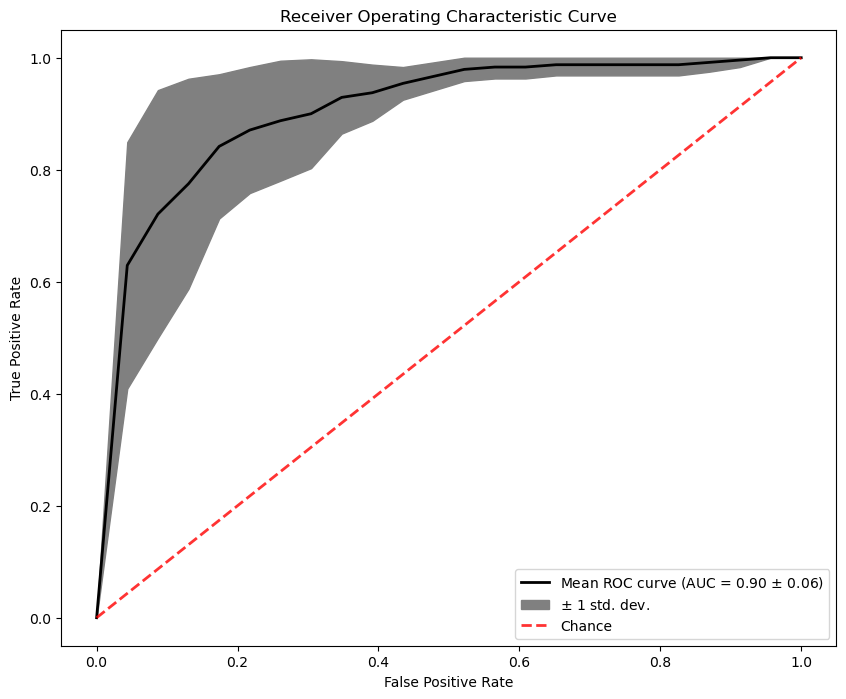

In [10]:
machine_learning.plotting.auc_curves(results_dict)

### Feature importances

Below are two examples of ways to plot the feature importance values as identified by the model. These were calculated using [perumation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html). as such the average value represents the absolute change in auc of the trained model on the test set when the values of that feature are shuffled.

Overall, this feature importance algorithm is widely regarded as one of the simplest and most robust methods to assess the contribution of different features to non-linear models.

`imps_simple_barplot` is the simplest way to show feature importances.

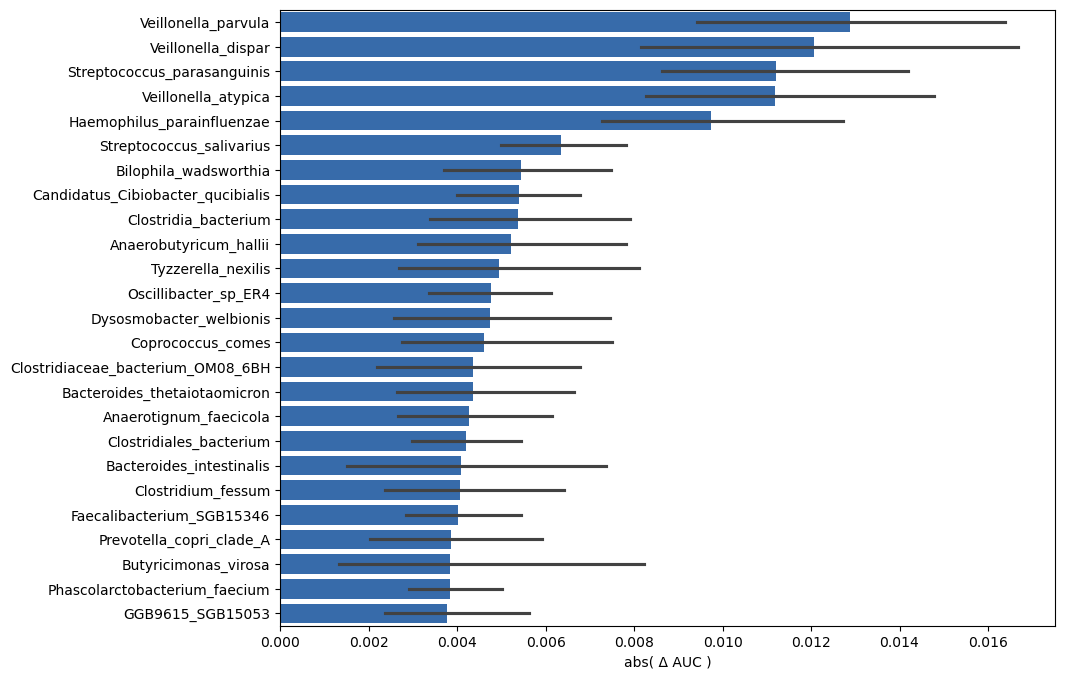

In [11]:
machine_learning.plotting.imps_simple_barplot(results_dict)

`imps_directional_barplot` shows a plot that is a little bit more sophisticated, it calculates the directionality of the relationship between each feature and the labels by calculating whether the average abundance is higher or lower in the positve class. Be mindful though, as the directionality is calculated with a hard cutoff, so a small difference in abundance can look exaggerated.

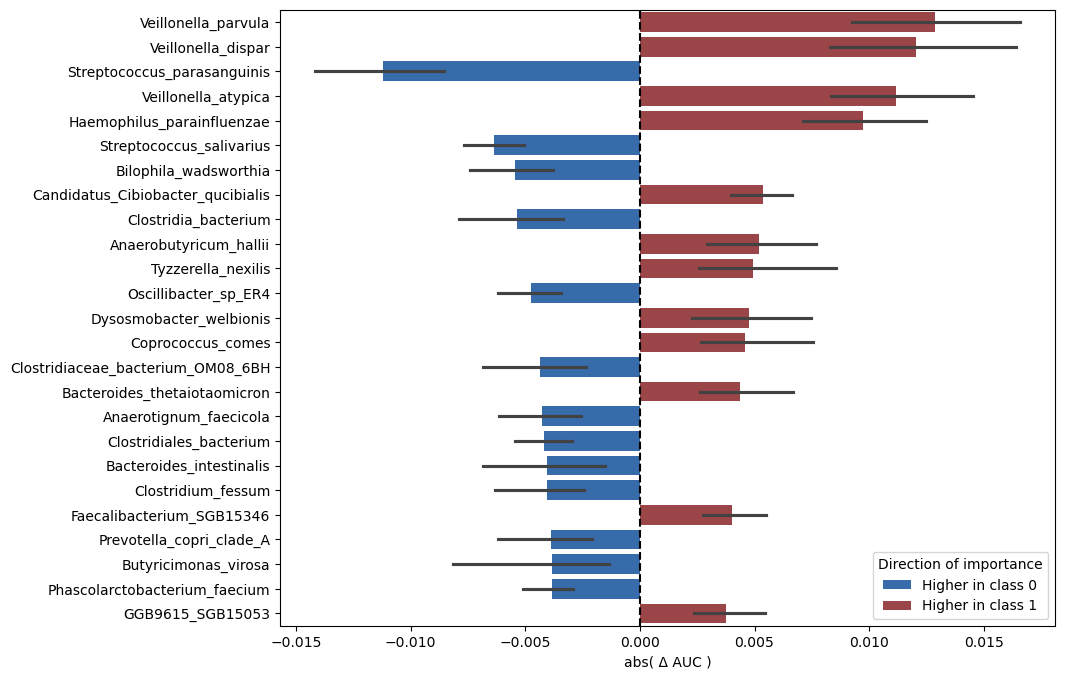

In [12]:
machine_learning.plotting.imps_directional_barplot(results_dict)